In [1]:
from manim import *
import numpy as np
from math import sqrt

In [2]:
scale = 3.5
step = 1

config.background_color = WHITE
config.frame_width = scale * 2
config.pixel_width = 1920
config.pixel_height = 1920

In [3]:
def DifferentialFunction(diffFunc, start, dx, xrange = [-10, 10], yrange = [-10, 10]):
    func = VGroup()
    (x, y) = (start[0], start[1])

    while (x > xrange[0] and x < xrange[1] and y > yrange[0] and y < yrange[1]):
        m = diffFunc(x, y)
        dy = m * dx
        newx = x + dx
        newy = y + dy
        func.add(Line((x, y, 0), (newx, newy, 0), color=BLACK))
        x = newx
        y = newy

    (x, y) = (start[0], start[1])
    dx = -dx

    while (x > xrange[0] and x < xrange[1] and y > yrange[0] and y < yrange[1]):
        m = diffFunc(x, y)
        dy = m * dx
        newx = x + dx
        newy = y + dy
        func.add(Line((x, y, 0), (newx, newy, 0), color=BLACK))
        x = newx
        y = newy
    
    return func

def SlopeField(diffFunc, x_range, y_range):
    func = lambda pos: ((1/sqrt(1 + (diffFunc(pos[0],pos[1]))**2)) * 10 * RIGHT) + (((diffFunc(pos[0],pos[1]))/sqrt(1 + (diffFunc(pos[0],pos[1]))**2)) * 10 * UP)
    return ArrowVectorField(func, color=BLACK, x_range=x_range,y_range=y_range)

Manim Community v0.18.1

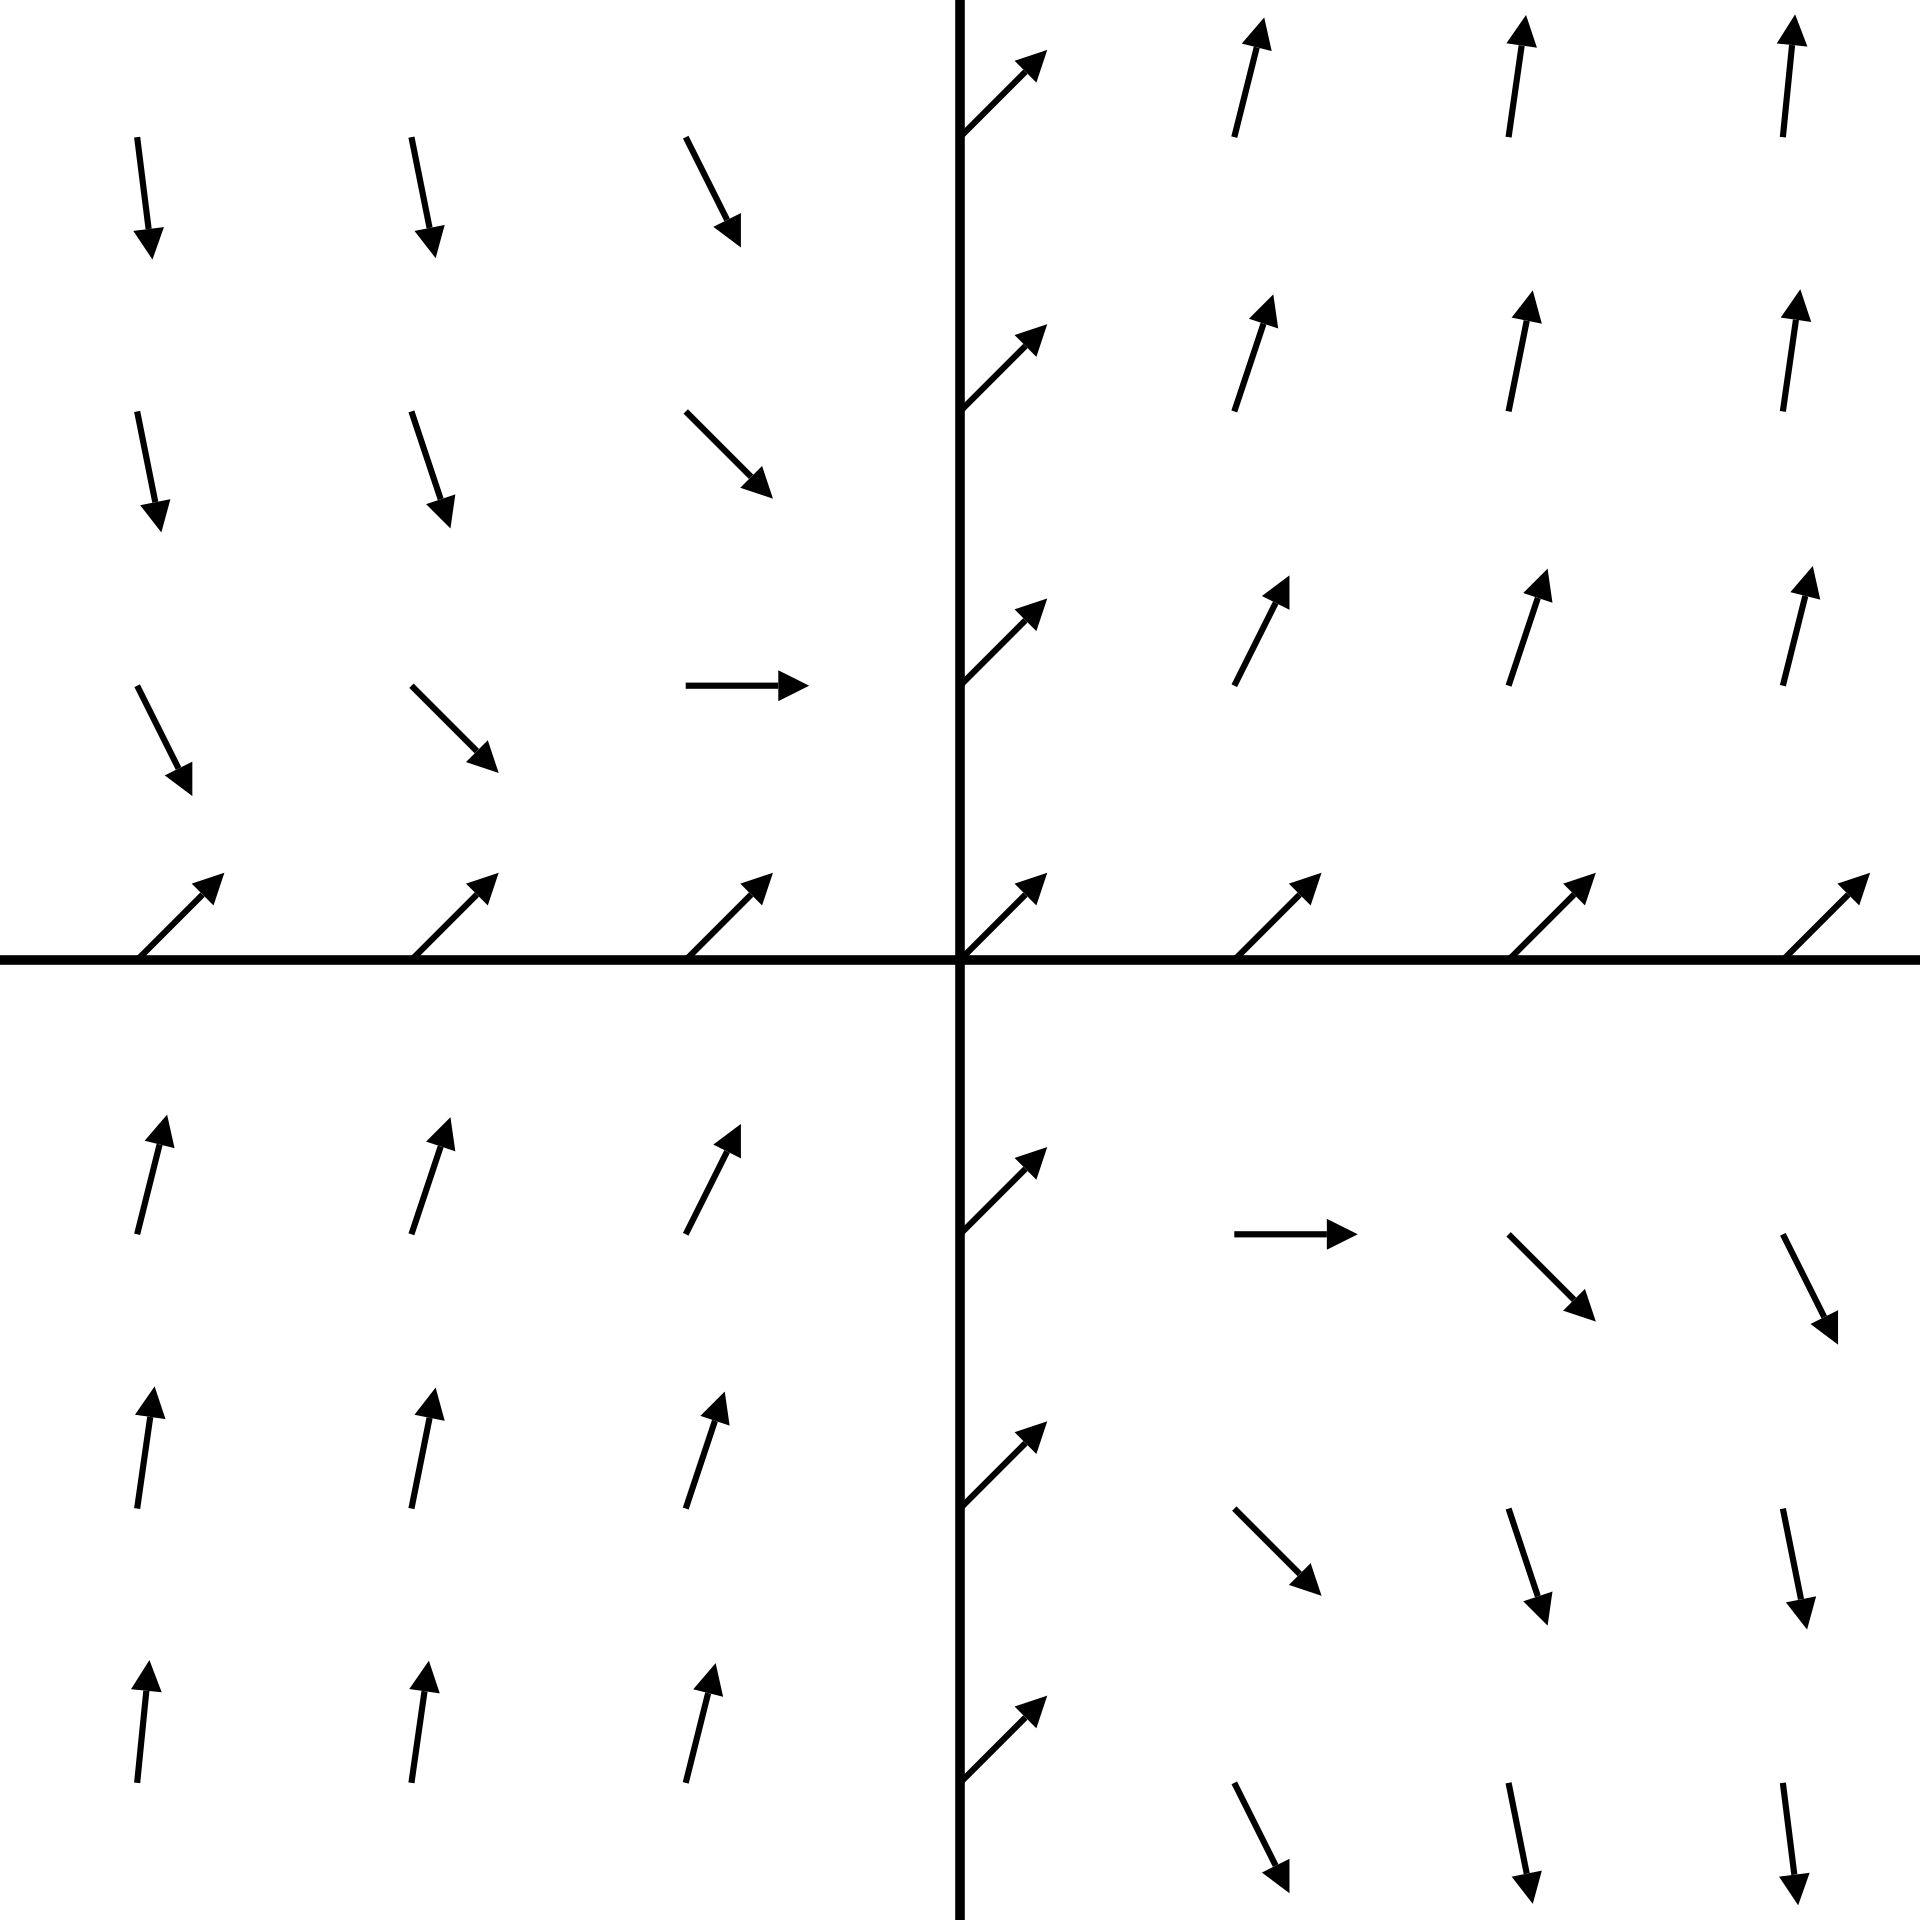

In [4]:
%%manim -v WARNING Slopes

class Slopes(Scene):
    def construct(self):
        field = SlopeField(lambda x,y: (x*y) + 1,  x_range=[-3, 3, 1],y_range=[-3, 3, 1])

        numberplane = NumberPlane(
        x_range = (-7, 7, 1),
        y_range = (-7, 7, 1),
        axis_config = {
            "color": BLACK, 
            "stroke_width": 3.5
        }, 
        background_line_style = {
            "stroke_color": WHITE,
            "stroke_width": 2,
            "stroke_opacity": 0.6
        })

        self.add(numberplane, field)

Manim Community v0.18.1

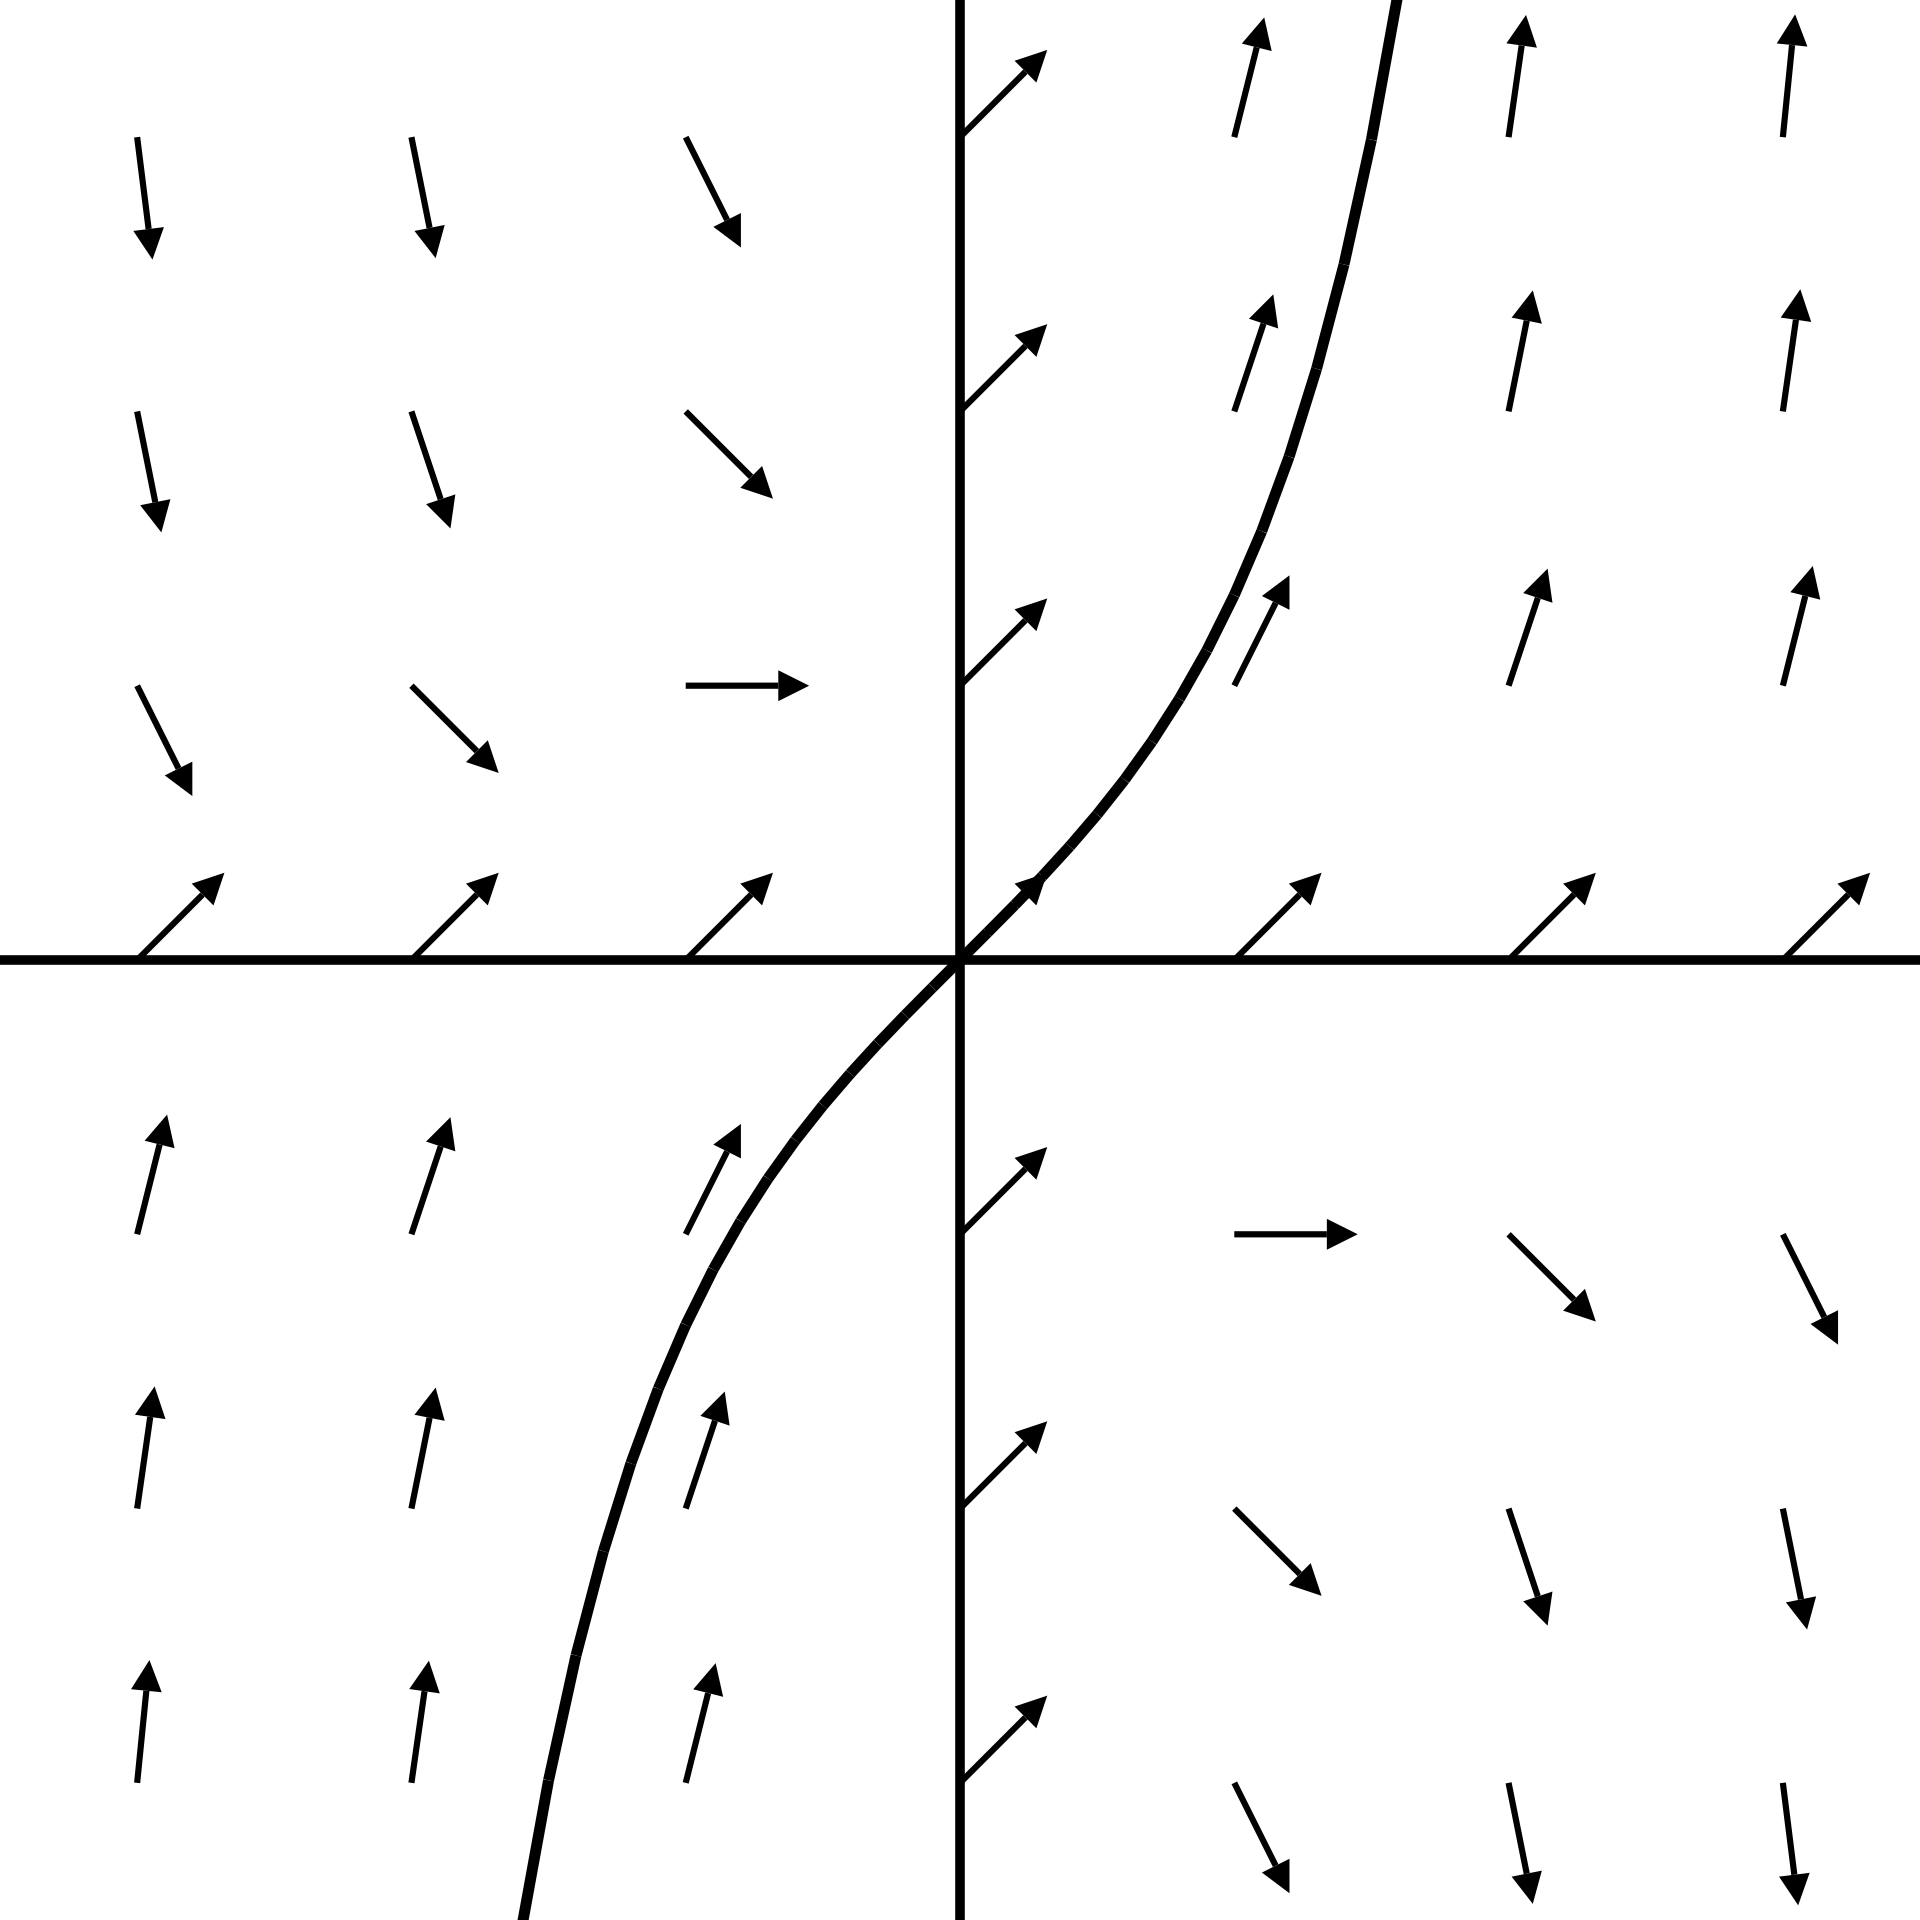

In [5]:
%%manim -v WARNING DiffEQ

class DiffEQ(Scene):
    def construct(self):
        field = SlopeField(lambda x,y: (x*y) + 1,  x_range=[-3, 3, 1],y_range=[-3, 3, 1])

        numberplane = NumberPlane(
        x_range = (-7, 7, 1),
        y_range = (-7, 7, 1),
        axis_config = {
            "color": BLACK, 
            "stroke_width": scale
        }, 
        background_line_style = {
            "stroke_color": WHITE,
            "stroke_width": 2,
            "stroke_opacity": 0.6
        })

        diffeq = DifferentialFunction(
            lambda x, y: (x * y) + 1, 
            start=(0,0), 
            dx=0.1, 
        )

        self.add(numberplane, field, diffeq)